In [33]:
from scraping import scraping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [31]:
scraping()

Page number:  2
Page number:  3
Page number:  4
Page number:  5
Page number:  6
Page number:  7
Page number:  8
Page number:  9
Page number:  10
Page number:  11
Page number:  12
Page number:  13
Page number:  14
Page number:  15
Page number:  16
Page number:  17
Page number:  18
Page number:  19
Page number:  20
Page number:  21
Page number:  22
Page number:  23
Page number:  24
Page number:  25
Page number:  26
Page number:  27
Page number:  28
Page number:  29
Page number:  30
Page number:  31
Page number:  32
Page number:  33
Page number:  34
Page number:  35
Page number:  36
Page number:  37
Page number:  38
Page number:  39
Page number:  40
Page number:  41
Page number:  42
Page number:  43
Page number:  44
Page number:  45
Page number:  46
Page number:  47
Page number:  48
Page number:  49
Page number:  50
Page number:  51
Page number:  52
Page number:  53
Page number:  54
Page number:  55
Page number:  56
Page number:  57
Page number:  58
Page number:  59
Page number:  60
Page 

# Check duplicates

In [34]:
df=pd.read_csv("moto-selection.csv")
df['reference+price'] = df['reference'].astype(str)  + df['price'].astype(str)
df['reference+price'].value_counts()

11890079800     7
11873427490     2
116934014499    2
118784111990    2
11662307490     2
               ..
118769916149    1
117599521900    1
11854295250     1
11829067490     1
11282894890     1
Name: reference+price, Length: 3854, dtype: int64

# Use this to remove duplicates in a dataframe

In [35]:
df=pd.read_csv("moto-selection.csv")
df.drop_duplicates(subset=['reference','price'], inplace=True)
df.to_csv("moto-station.csv", index=False)

# Explore data

In [36]:
df = pd.read_csv("moto-selection.csv")
df.head()

,uniq_id,reference,bike_type,bike_size,bike_year,bike_year_circulation,bike_km,bike_color,bike_warranty,bike_description,price,bike_brand,bike_model,vendor_city,vendor_type,source,scrap_date,url
0,moto-selection-1188962,1188962,SCOOTER,125,2018,0,7650,NaN,NaN,"ABS,Saute vent,Financement possible,Aucun co...",2590,SYM,GTS,La Garenne Colombes,Pro,moto-selection,2021-06-05 11:26:35.679271,http://www.moto-selection.com/moto-occasion/sy...
1,moto-selection-1189047,1189047,ROUTIÈRE,689,2021,0,650,NaN,NaN,"Moto de demonstration, equipée avec selle conf...",8999,YAMAHA,TRACER 7,Ruaudin,Pro,moto-selection,2021-06-05 11:26:41.996123,http://www.moto-selection.com/moto-occasion/ya...
2,moto-selection-1189029,1189029,TRAIL,1000,2014,0,11818,NaN,NaN,"KAWASAKI 1000 VERSYS abs ! Véhicule révisé, en...",7990,KAWASAKI,1000 VERSYS,Limonest,Pro,moto-selection,2021-06-05 11:26:47.181785,http://www.moto-selection.com/moto-occasion/ka...
3,moto-selection-1188958,1188958,ROADSTER,600,2003,0,41200,NaN,NaN,SELLE CONFORT POT SCORPION POIGNÉES CHAUFFAN...,3490,HONDA,CB HORNET,Dunkerque,Pro,moto-selection,2021-06-05 11:26:47.263209,http://www.moto-selection.com/moto-occasion/ho...
4,moto-selection-1188980,1188980,ROADSTER,650,2015,0,1545,NaN,NaN,"ABS, REVISION ANNUELLE FAITE AUCUN FRAIS A PRE...",4500,KAWASAKI,ER-6,Aulnay Sous Bois,Pro,moto-selection,2021-06-05 11:26:47.350158,http://www.moto-selection.com/moto-occasion/ka...


In [37]:
df.shape

(3898, 18)

In [38]:
df.reference.value_counts()

1189007    8
1185443    3
1174928    3
1187841    3
1187839    3
          ..
1182444    1
1159919    1
1188597    1
1186550    1
1189117    1
Name: reference, Length: 3815, dtype: int64

In [39]:
df.bike_brand.value_counts()

YAMAHA             847
HONDA              638
SUZUKI             413
BMW                404
KAWASAKI           382
PIAGGIO            252
TRIUMPH            155
DUCATI             145
KTM                140
KYMCO               90
HARLEY DAVIDSON     58
APRILIA             56
PEUGEOT             54
INDIAN              54
HUSQVARNA           44
SYM                 35
MBK                 26
QUADRO              15
SHERCO              12
BENELLI             11
DAELIM              10
BETA                 9
HYOSUNG              6
GILERA               5
RIEJU                5
CF MOTO              4
BIMOTA               2
POLARIS              2
MALAGUTI             2
MVAGUSTA             2
VOXAN                2
BUELL                2
NORTON               1
HYTRACK              1
SIDE BIKE            1
FYM                  1
HM                   1
LAMBRETTA            1
TNT                  1
LINHAI               1
HUSABERG             1
TGB                  1
MOTOGUZZI            1
JINLUN     

In [40]:
df.bike_model.value_counts()

R 1200                   106
BURGMAN                   80
X-MAX 300 ABS             45
NSS FORZA 125             39
Z 900                     39
                        ... 
SATELIS RS 125             1
SOFTAIL DELUXE             1
BURGMAN EXECUTIVE 650      1
GSXR 1000 RR               1
GL1800                     1
Name: bike_model, Length: 1337, dtype: int64

## Bike Price

In [41]:
df.price.mean()

7388.806824012314

(0.0, 60000.0)

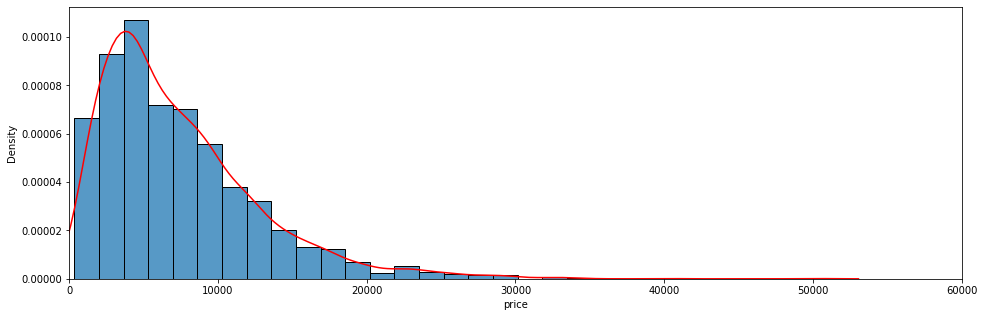

In [42]:
fig = plt.figure(figsize=(16, 5))
feat = "price"
sns.histplot(df[feat], palette='Blues', stat='density', bins=30)
sns.kdeplot(df[feat], color='red')
plt.xlim(0, 60000)

## Bike km

(0.0, 150000.0)

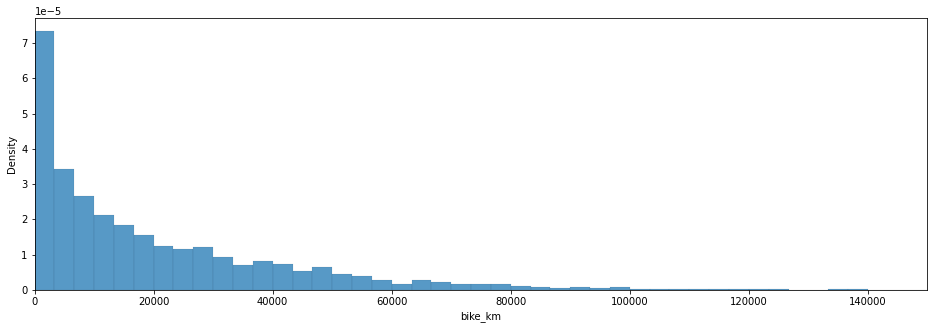

In [43]:
fig = plt.figure(figsize=(16, 5))
feat = "bike_km"
sns.histplot(df[feat], palette='Blues', stat='density', bins=1500)
plt.xlim(0, 150000)

## Bike year

(1980.0, 2021.0)

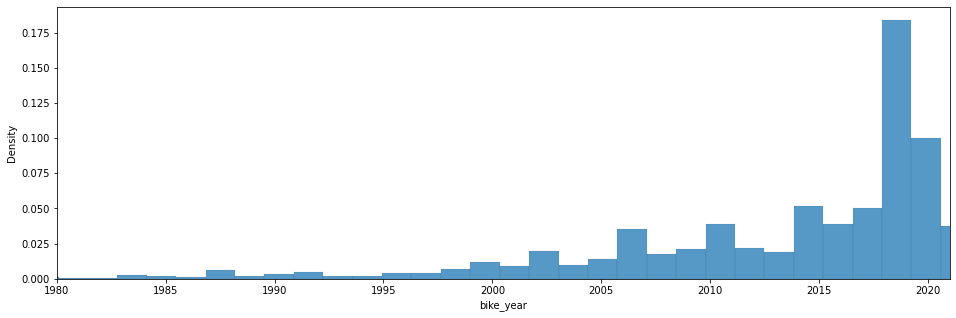

In [44]:
fig = plt.figure(figsize=(16, 5))
feat = "bike_year"
sns.histplot(df[feat], palette='Blues', stat='density', bins=1500)
plt.xlim(1980, datetime.now().year)

## Correlation Matrix

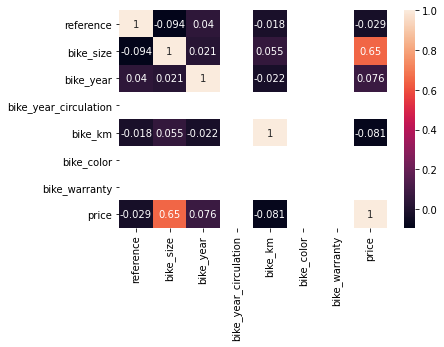

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()